# Template Code : DecisionTree Classifier

Task : To predict species of penguin based on physical attributes

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load, Analyse and Clean Data

In [5]:
# Load data
df = pd.read_csv("penguins_size.csv")

In [6]:
# Check the data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# Check for missing data
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df = df.dropna() # We are dropping in this case as drop % = 100*10/344 is small

In [10]:
df.info() # Check dropped data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
# Check categorical features

print("Sex Categories : ",df['sex'].unique())
print("Island Categories : ",df['island'].unique())

Sex Categories :  ['MALE' 'FEMALE' '.']
Island Categories :  ['Torgersen' 'Biscoe' 'Dream']


In [12]:
df = df[df['sex']!='.'] # drop the datapoint with missing sex

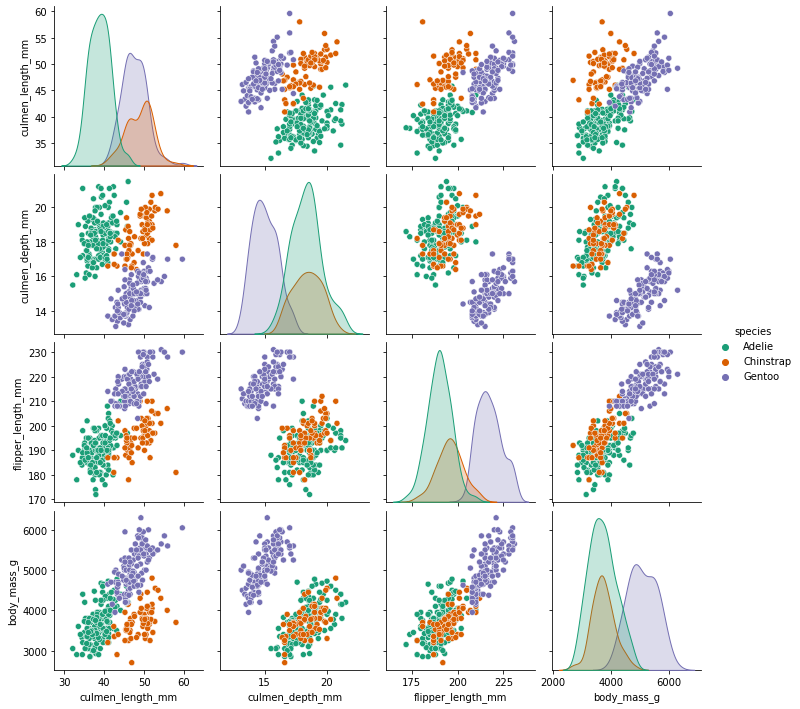

In [13]:
# Visualisation
sns.pairplot(df,hue='species',palette='Dark2')

In [14]:
# Convert categorical data to dummy variables

pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [15]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [16]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# Model Development

In [17]:
# Model Initialisation

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# Predict

base_pred = model.predict(X_test)

In [19]:
# Evaluation

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [20]:
confusion_matrix(y_test,base_pred)

array([[38,  2,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


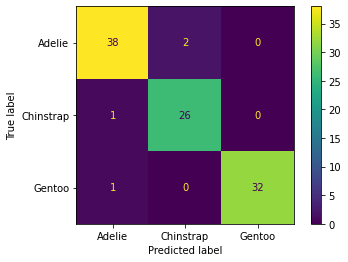

In [23]:
plot_confusion_matrix(model,X_test,y_test)

In [24]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [28]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.045822
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.044918
island_Torgersen,0.000000
sex_MALE,0.000000


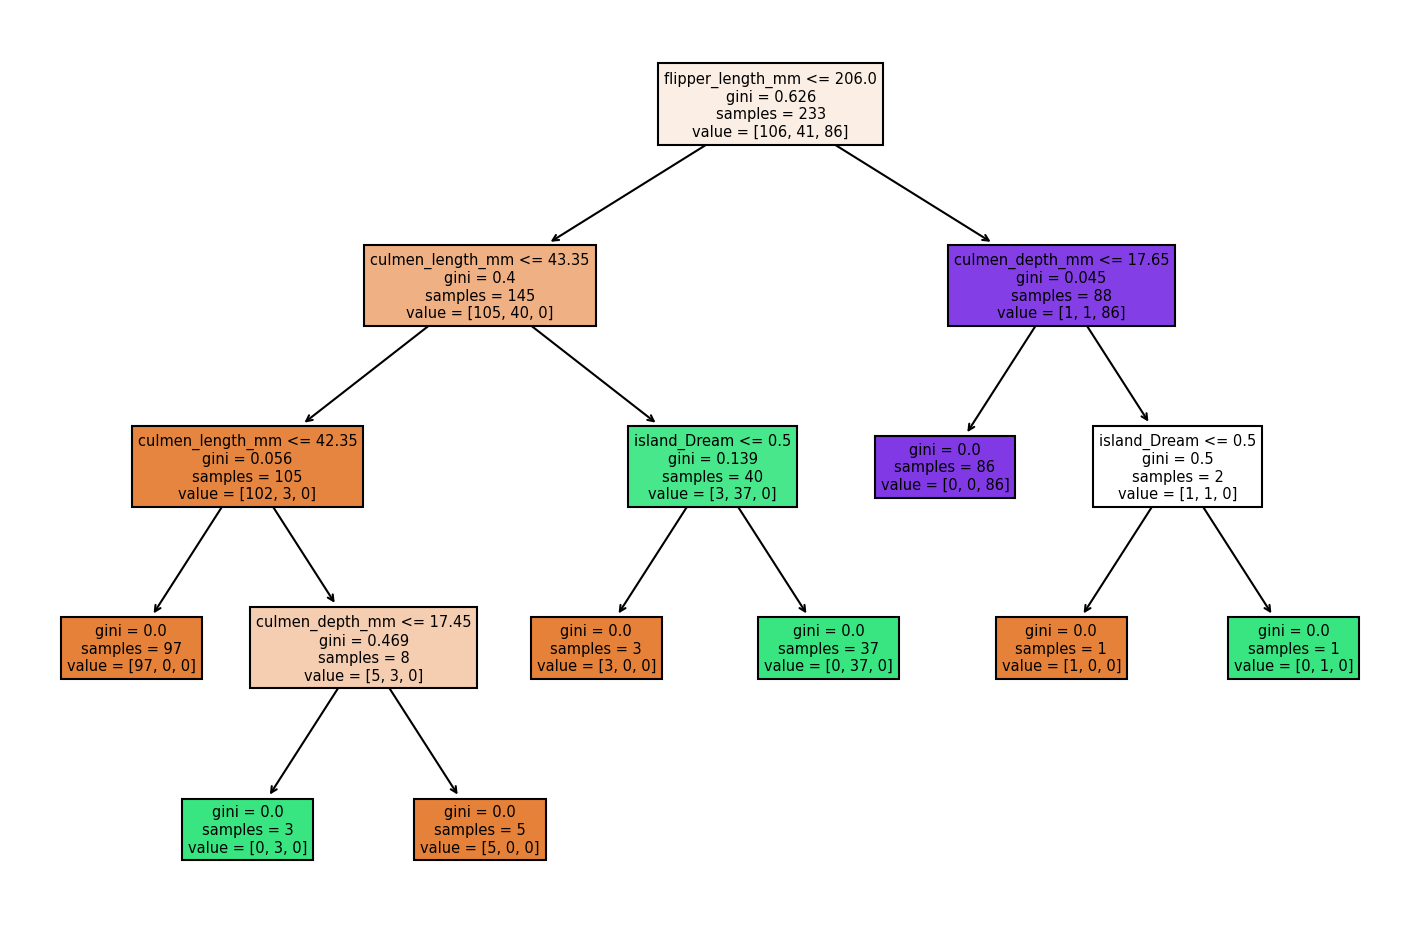

In [32]:
# Visualise the tree

from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);